# Activity explorer
This piece of code is to explore the function of going through the synthetic population and grabbing an appropriate activity profile for the individual

In [2]:
import tripsender.nhts as nhts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and clean data

In [5]:
# Read data
nhts_data = pd.read_csv('data/raw/NHTS/Data_RVU_2017_GBG_utanEXTRA.csv', sep=';')

# Preprocess data
df_activity = nhts.preprocess_data(nhts_data,unique_trips_only = False)
df_persons = nhts.preprocess_data(nhts_data,unique_trips_only = True)

c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\OSMnx\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (34,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Exploring common activity sequence

In [6]:
# Get list of all unique activities
activities = df_activity['purpose'].unique()

# Create a dictionary to help rename activities to abbrevations
activity_to_abbrevation = {
    'Work': 'W',
    'Home': 'H',
    'Leisure': 'L',
    'Grocery shopping': 'SG',
    'Other shopping': 'SO',
    'Education': 'E',
    'Pickup/Dropoff child': 'PD',
    'Travel': 'T',
    'Healthcare': 'HC',
    'Other': 'X'
    }

# create an activity sequence like W-H-L-SG-SO-E-PD-T-HC-X for each person and save it in a new column called activity_sequence of df_persons
df_persons['activity_sequence'] = df_persons['id'].map(df_activity.groupby('id')['purpose'].apply(lambda x: '-'.join(x.map(activity_to_abbrevation))))
# Adding H to the beginning of the activity sequence of df_persons
df_persons['activity_sequence'] = df_persons['activity_sequence'].apply(lambda x: 'H-' + x if x[0] != 'H' else x)
# Create a new DF with unique activity sequences and their frequency
df_activity_sequence = df_persons['activity_sequence'].value_counts().reset_index()
# Rename columns
df_activity_sequence.columns = ['activity_sequence', 'frequency']


In [16]:
df_activity_sequence.head()

,activity_sequence,frequency
0,H-W-H,1973
1,H-W-H-L-H,444
2,H-W-L-H,351
3,H-L-H,335
4,H-W-SG-H,294


# Common activity sequence for each activity type

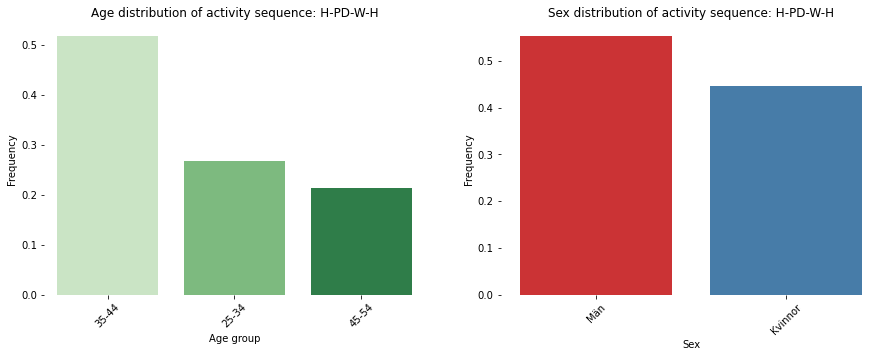

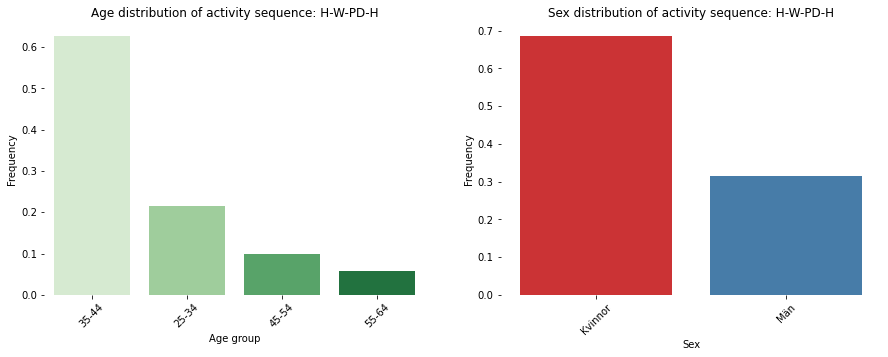

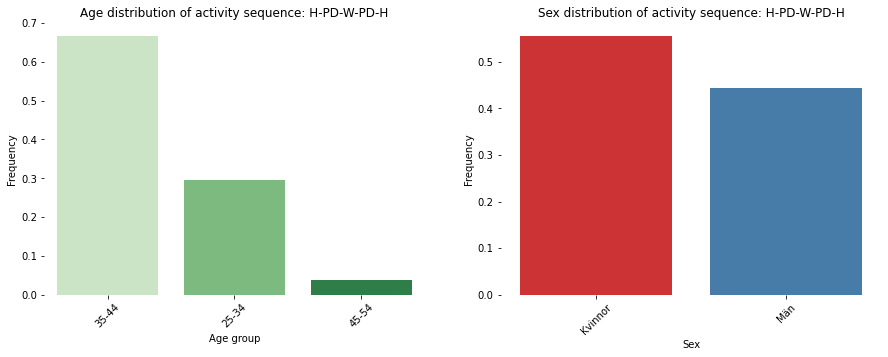

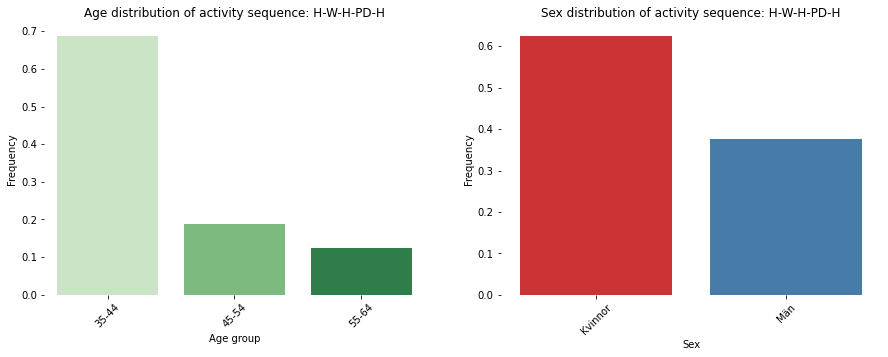

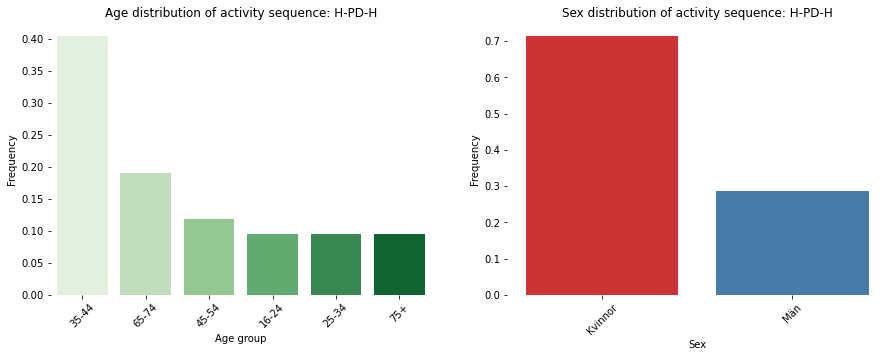

In [14]:
# Plot an age distribution and a gender distribution of each of the sequence from top 5 sequences with PD in them

# Get the top 5 activity sequences with PD in them
top_5_activity_sequences = df_activity_sequence[df_activity_sequence['activity_sequence'].str.contains('PD')].head(5)['activity_sequence'].values

# Looping through each of the top 5 activity sequences
for pd_sequence in top_5_activity_sequences:
    # Get the age distribution of the current activity sequence and gender distribution of the current activity sequence
    age_distribution = df_persons[df_persons['activity_sequence'] == pd_sequence]['age_group'].value_counts(normalize=True).reset_index()
    gender_distribution = df_persons[df_persons['activity_sequence'] == pd_sequence]['sex'].value_counts(normalize=True).reset_index()
    
    # Creat a subplot with 1 row and 2 columns. Age on left gender on the right
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting the age distribution
    sns.barplot(x=age_distribution['index'], y=age_distribution['age_group'], palette='Greens', ax=ax1)
    ax1.set_title('Age distribution of activity sequence: ' + pd_sequence)
    ax1.set_xlabel('Age group')
    ax1.set_ylabel('Frequency')
    # Remove border
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


    # Plotting gender distribution
    sns.barplot(x=gender_distribution['index'], y=gender_distribution['sex'], palette='Set1', ax=ax2)
    ax2.set_title('Sex distribution of activity sequence: ' + pd_sequence)
    ax2.set_xlabel('Sex')
    ax2.set_ylabel('Frequency')
    # Remove border
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    plt.show()


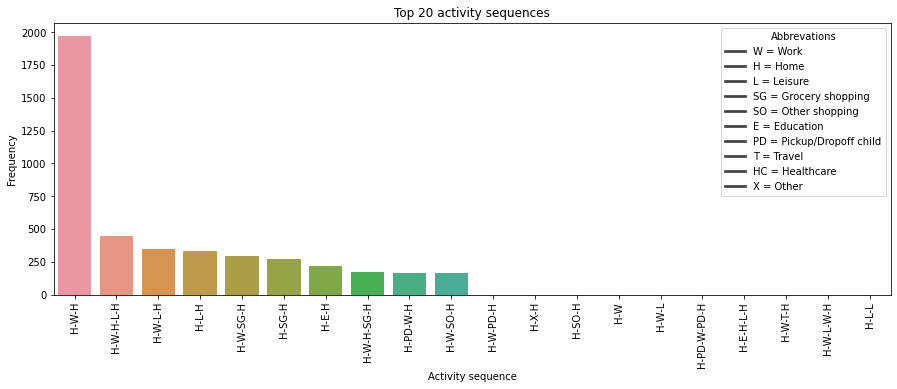

In [15]:
# Plot the top 20 activity sequences
plt.figure(figsize=(15, 5))
sns.barplot(x=df_activity_sequence['activity_sequence'].head(20), y=df_activity_sequence['frequency'].head(10))
plt.title('Top 20 activity sequences')
plt.xlabel('Activity sequence')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Create a list of abbrevations
abbrevations = list(activity_to_abbrevation.values())
# Create a list of activity names
activity_names = list(activity_to_abbrevation.keys())

# Create a list of strings with abbrevation and activity name
abbrevation_activity_name = [abbrevation + ' = ' + activity_name for abbrevation, activity_name in zip(abbrevations, activity_names)]
# Add to legend
plt.legend(abbrevation_activity_name, loc='upper right', title='Abbrevations')
plt.show()